Import Packages

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Linear Regression Class

In [2]:
class LinReg(object):
    def __init__(self):
        self.t0=200
        self.t1=100000
    
    def predict(self,X:np.ndarray)->np.ndarray:
        return X@self.w
    
    def loss(self,X:np.ndarray,y:np.ndarray)->float:
        error=y-self.predict(X)
        return 0.5*np.transpose(error)@error
    
    def rmse(self,X:np.ndarray,y:np.ndarray)->float:
        return np.sqrt((2/X.shape[0])*self.loss(X,y))
    
    def fit(self,X:np.ndarray,y:np.ndarray)->np.ndarray:
        self.w=np.linalg.pinv(X)@y
        return self.w

    def calculate_gradient(self,X:np.ndarray,y:np.ndarray)->np.ndarray:
        return np.transpose(X)@(self.predict(X)-y)

    def update_weights(self,grad:np.ndarray,lr:float)->np.ndarray:
        return (self.w-lr*grad)
    
    def learning_schedule(self,t):
        return self.t0/(self.t1+t)
    
    def gradient_descent(self,X:np.ndarray,y:np.ndarray,num_epochs:int,lr:float)->np.ndarray:
        self.w=np.zeros((X.shape[1]))
        self.w_all=[]
        self.err_all=[]
        for i in range(num_epochs):
            dJdW=self.calculate_gradient(X,y)
            self.w_all.append(self.w)
            self.err_all.append(self.loss(X,y))
            self.w=self.update_weights(dJdW,lr)
        return self.w
    
    def mini_batch_gradient_descent(self,X:np.ndarray,y:np.ndarray,num_epochs:int,batch_size:int)->np.ndarray:
        self.w=np.zeros((X.shape[1]))
        self.w_all=[]
        self.err_all=[]
        mini_batch_id=0

        for epoch in range(num_epochs):
            shuffled_indices=np.random.permutation(X.shape[0])
            X_shuffled=X[shuffled_indices]
            y_shuffled=y[shuffled_indices]
            for i in range(0,X.shape[0],batch_size):
                mini_batch_id+=1
                xi=X_shuffled[i:i+batch_size]
                yi=y_shuffled[i:i+batch_size]
                
                self.w_all.append(self.w)
                self.err_all.append(self.loss(xi,yi))

                dJdW=(2/batch_size)*self.calculate_gradient(xi,yi)
                self.w=self.update_weights(dJdW,self.learning_schedule(mini_batch_id))
        return self.w

    def stochastic_gradient_descent(self,X:np.ndarray,y:np.ndarray,num_epochs:int)->np.ndarray:
        self.w=np.zeros((X.shape[1]))
        self.w_all=[]
        self.err_all=[]

        for epoch in range(num_epochs):
            for i in range(X.shape[0]):
                random_index=np.random.randint(X.shape[0])
                xi=X[random_index:random_index+1]
                yi=y[random_index:random_index+1]

                self.w_all.append(self.w)
                self.err_all.append(self.loss(xi,yi))

                gradients=2*self.calculate_gradient(xi,yi)
                lr=self.learning_schedule(epoch*X.shape[0]+i)
                self.w=self.update_weights(gradients,lr)
        return self.w

Function to Generate Training Data with n samples for y = w0 + w1*X

In [3]:
def generate_data(n):
    w1 = 3
    w0 = 4
    X = 10 * np.random.rand(n,)
    y = w0+w1*X+np.random.rand(n,)
    return X,y

Preprocessing : Function to Add Dummy Feature Column to the Feature Matrix and Create Train-Test Split

In [4]:
from sklearn.model_selection import train_test_split
def add_dummy(x): return np.column_stack((np.ones(x.shape[0]),x))
def preprocess(X,y):
  X_dummy = add_dummy(X)
  return  train_test_split(X_dummy,y,test_size = 0.2, random_state = 42)

In [5]:
X,y=generate_data(100)
X_train, X_test, y_train, y_test = preprocess(X,y)

In [6]:
np.random.randint(0,X.shape[0])

59

Visualize the Data 

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

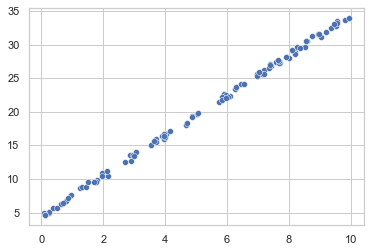

In [7]:
sns.set(style='whitegrid')
sns.scatterplot(X,y)

Comparing Weights obtained by Normal Equation, GD, MBGD, SGD

In [8]:
lin_reg=LinReg()
lin_reg.fit(X_train,y_train)
print("Weight Vector for Normal Equation : ",lin_reg.w)

Weight Vector for Normal Equation :  [4.55378599 2.99638339]


In [9]:
lin_reg.gradient_descent(X_train,y_train,num_epochs=1000,lr=1e-4)
print("Weight Vector for Gradient Descent : ",lin_reg.w)

Weight Vector for Gradient Descent :  [3.94333367 3.08717666]


In [10]:
lin_reg.mini_batch_gradient_descent(X_train,y_train,num_epochs=1000,batch_size=16)
print("Weight Vector for Mini Batch Gradient Descent : ",lin_reg.w)

Weight Vector for Mini Batch Gradient Descent :  [4.51346744 3.00183828]


In [11]:
lin_reg.stochastic_gradient_descent(X_train,y_train,num_epochs=1000)
print("Weight Vector for Stochastic Gradient Descent : ",lin_reg.w)

Weight Vector for Stochastic Gradient Descent :  [4.54362381 3.00353559]


Linear Regression on Mlutiple Features and Single Label

In [12]:
from sklearn.datasets import make_regression
X,y,coef=make_regression(n_samples=200,n_features=10,n_informative=10,
                            n_targets=1,shuffle=True,coef=True,noise=0.5,random_state=12)


In [13]:
print('Shape of Feature Matrix : ',X.shape)
print('Shape of Label Vector : ',y.shape)
print('Shape of Weight Vector used for Data Generation : ',coef.shape)

Shape of Feature Matrix :  (200, 10)
Shape of Label Vector :  (200,)
Shape of Weight Vector used for Data Generation :  (10,)


In [14]:
X_train, X_test, y_train, y_test = preprocess(X,y)

Function to plot Learning Curves

In [15]:
def plot_learning_curves(err_all):
    plt.plot(err_all)
    plt.xlabel('Iteration Number')
    plt.ylabel('Loss')

Comparison of weight vector estimated from different methods

In [16]:
lin_reg.fit(X_train,y_train)
print("Weight Vector for Normal Equation : ",lin_reg.w)

Weight Vector for Normal Equation :  [-3.72509039e-02  5.40677229e+01  7.97134001e+01  7.21252563e+01
  2.97537854e+01  1.51426496e+01  1.61065343e+01  2.35187978e+01
  4.49051043e+01  8.94824620e+01  7.89275814e+01]


In [17]:
np.testing.assert_almost_equal(coef,lin_reg.w[1:],decimal=0)

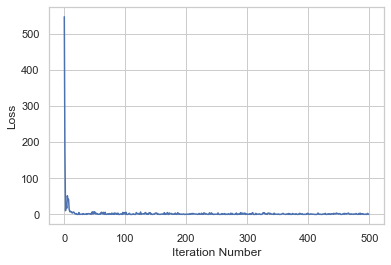

In [18]:
plot_learning_curves(lin_reg.err_all[:500])

In [19]:
lin_reg.gradient_descent(X_train,y_train,num_epochs=1000,lr=1e-4)
print("Weight Vector for Gradient Descent : ",lin_reg.w)

Weight Vector for Gradient Descent :  [-3.77829261e-02  5.40667549e+01  7.97129000e+01  7.21247689e+01
  2.97521252e+01  1.51454647e+01  1.61074397e+01  2.35183952e+01
  4.49039507e+01  8.94806589e+01  7.89273461e+01]


In [20]:
np.testing.assert_almost_equal(coef,lin_reg.w[1:],decimal=0)

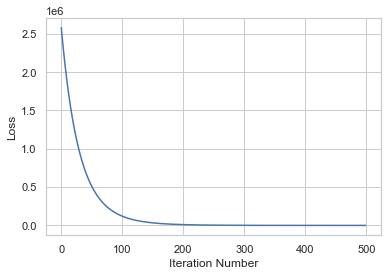

In [21]:
plot_learning_curves(lin_reg.err_all[:500])

In [22]:
lin_reg.mini_batch_gradient_descent(X_train,y_train,num_epochs=1000,batch_size=16)
print("Weight Vector for Mini Batch Gradient Descent : ",lin_reg.w)

Weight Vector for Mini Batch Gradient Descent :  [-3.72984247e-02  5.40677418e+01  7.97133358e+01  7.21252305e+01
  2.97538240e+01  1.51426623e+01  1.61065623e+01  2.35188128e+01
  4.49051493e+01  8.94824489e+01  7.89274891e+01]


In [23]:
np.testing.assert_almost_equal(coef,lin_reg.w[1:],decimal=0)

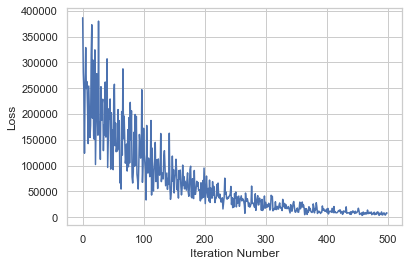

In [24]:
plot_learning_curves(lin_reg.err_all[:500])

In [25]:
lin_reg.stochastic_gradient_descent(X_train,y_train,num_epochs=1000)
print("Weight Vector for Stochastic Gradient Descent : ",lin_reg.w)

Weight Vector for Stochastic Gradient Descent :  [-3.12959669e-02  5.40674239e+01  7.97272289e+01  7.21083597e+01
  2.97431217e+01  1.51443075e+01  1.61214741e+01  2.35036877e+01
  4.49098651e+01  8.94897036e+01  7.89079451e+01]


In [26]:
np.testing.assert_almost_equal(coef,lin_reg.w[1:],decimal=0)

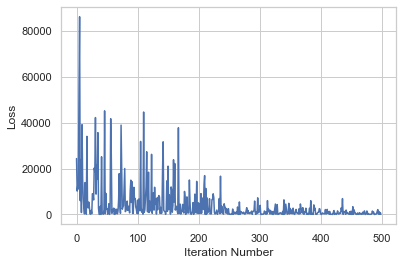

In [27]:
plot_learning_curves(lin_reg.err_all[:500])